In [1]:
import cobra
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from pandas import DataFrame
import statistics
import plotly
import plotly.express as px
import plotly.graph_objs as go
import visualisation
import sklearn
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy as sp

# Load in proteomics and transcriptomics datasets, and find the overlapping mRNA/gene pair IDs. 

In [3]:
t_omics = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP_PhD_UoM/Datasets/Alternative datasets/CCLE main spreadsheets/OC_transcriptomics_common_IDs.csv', index_col = [0])
t_omics_nona = t_omics.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
t_omics_nona

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,TMEM216,RPS19BP1,TMPRSS11A,TMEM262,C3orf70,TEAD1,OR2AK2,PLCD1,CCK,ENTPD5
OC Broad IDs,,,,,,,,,,,,,,,,,,,,,
Caov3,5.702103,0.000000,7.109778,1.773996,3.505891,0.084064,2.885574,6.671576,6.387673,5.299391,...,4.685380,6.788816,0.042644,0.807355,0.485427,5.454834,0.042644,1.875780,0.594549,2.189034
COV362,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,4.214125,5.167920,0.028569,0.910733,0.014355,4.887525,0.000000,2.601697,2.695994,2.724650
TYK-nu,2.904966,0.000000,6.483816,2.121015,3.939227,0.014355,0.150560,5.308521,3.555816,4.520422,...,0.505891,6.312520,0.042644,0.650765,0.000000,3.326250,0.000000,1.232661,0.000000,2.680324
OVCAR-4,4.947199,0.201634,6.754353,1.599318,3.694880,0.014355,0.632268,4.953265,3.763412,3.519793,...,4.165108,6.401903,0.000000,0.773996,0.000000,4.038261,0.000000,1.713696,0.704872,2.232661
SNU-119,4.893848,0.000000,6.059399,2.223423,3.420887,0.042644,2.813525,7.176223,4.002703,5.774524,...,4.627023,5.860218,0.000000,1.035624,0.298658,5.639232,0.000000,2.925999,0.286881,3.343408
FU-OV-1,5.932864,0.604071,6.687341,1.959770,3.896272,0.028569,0.163499,5.047015,4.301588,4.521051,...,3.990047,5.919340,0.000000,0.773996,0.042644,5.700162,0.000000,1.014355,0.150560,2.889474
IGROV-1,4.842476,0.000000,6.193969,2.046142,2.885574,0.056584,0.432959,6.395577,4.014355,4.774524,...,4.291309,6.303050,0.028569,0.641546,0.000000,5.316146,0.000000,1.232661,0.056584,3.382667
HEY A8,4.410748,0.000000,7.077029,1.937344,3.809414,0.000000,0.505891,6.069960,4.341986,3.363171,...,3.203201,6.118526,0.000000,0.575312,0.454176,4.207893,0.000000,1.443607,0.000000,2.735522
JHOS-2,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,4.507795,6.358256,0.028569,0.713696,0.084064,5.194954,0.000000,2.849999,1.416840,2.653060


In [4]:
no_repeats_p = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP_PhD_UoM/Datasets/Alternative datasets/CCLE main spreadsheets/p_omics_nona_2.csv', index_col = [0])
no_repeats_p

,Caov3,COV362,TYK-nu,OVCAR-4,SNU-119,FU-OV-1,IGROV-1,HEY A8,JHOS-2,NIHOVCAR3,OV56,OVSAHO,RMUG-S,OV-90,A2780,KURAMOCHI,OVCAR-8
OC Broad IDs,,,,,,,,,,,,,,,,,
SLC12A2,1910.550,1356.2400,1770.430,3238.0700,1577.9800,1035.800,1584.850,552.014,3511.080,4929.630,979.6590,844.3640,1353.9600,4579.6200,2304.270,890.4740,198.499
KDM1A,3431.110,3604.5600,4082.880,2743.7200,8339.7700,4262.110,3270.200,2494.560,2541.170,4896.790,2033.2200,2026.4100,1933.3200,2501.9600,5403.950,6787.6700,1835.440
SRP14,1722.880,1911.5800,3556.680,799.0800,2211.9900,1013.020,1985.440,1105.230,800.601,680.314,621.9970,367.7460,1775.5400,598.3720,3699.620,2078.2800,937.948
SLC15A4,734.910,183.6790,539.212,107.9000,492.0700,477.759,495.788,306.535,738.288,685.644,572.0590,97.0091,189.3510,287.6690,198.287,339.0220,188.189
SOGA1,257.114,1336.0200,480.452,820.4430,802.8070,355.285,546.669,881.870,1632.000,2642.170,452.1630,514.2010,2109.6000,627.0700,904.750,227.0750,1455.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MRPL18,1197.190,803.1180,473.428,248.9150,583.1090,519.475,782.294,245.433,149.741,294.517,135.3420,267.0310,241.3900,604.7090,398.053,604.9940,145.122
C10orf32,308.208,81.5937,290.009,31.8158,28.5993,363.588,181.824,513.186,227.342,249.439,85.0571,250.8530,134.2320,489.8140,684.790,157.3880,165.619
SF3B5,1071.960,1241.0400,1303.740,1034.6000,1693.6000,1349.960,2096.780,974.386,564.180,1159.720,1164.6200,1342.5400,321.4380,1226.9600,933.716,1426.7000,2062.780


In [5]:
ids = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP_PhD_UoM/Datasets/Alternative datasets/CCLE main spreadsheets/ids_4.csv')
ids

,transcriptomics,proteomics
0,TSPAN6,SLC12A2
1,TNMD,KDM1A
2,DPM1,SRP14
3,SCYL3,SLC15A4
4,C1orf112,SOGA1
...,...,...
16378,TEAD1,NaN
16379,OR2AK2,NaN
16380,PLCD1,NaN
16381,CCK,NaN


In [6]:
tomics_ids = ids['transcriptomics']
pomics_ids = ids['proteomics']

In [7]:
tomics_ids = list(dict.fromkeys(tomics_ids))
pomics_ids = list(dict.fromkeys(pomics_ids))
print('number of transcriptomics ids: ', len(tomics_ids))
print('number of proteomics ids: ', len(pomics_ids))

number of transcriptomics ids:  16383
number of proteomics ids:  5828


In [8]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [9]:
overlapping_ids = intersection(pomics_ids, tomics_ids)
print('number of ids which overlap between datasets: ', len(overlapping_ids))

number of ids which overlap between datasets:  5005


# Create proteomics subset containing only those proteins overlapping with transcriptomics. 

In [10]:
column_names = ['mRNA/gene pair', 'Caov3', 'COV362', 'TYK-nu', 'OVCAR-4', 'SNU-119', 'FU-OV-1', 'IGROV-1', 'HEY A8', 'JHOS-2', 'NIHOVCAR3', 'OV56 ', 'OVSAHO', 'RMUG-S', 'OV-90', 'A2780', 'KURAMOCHI', 'OVCAR-8']
p_subset = pd.DataFrame(columns = column_names)
p_subset['mRNA/gene pair'] = overlapping_ids
p_subset = p_subset.set_index('mRNA/gene pair')
p_subset

,Caov3,COV362,TYK-nu,OVCAR-4,SNU-119,FU-OV-1,IGROV-1,HEY A8,JHOS-2,NIHOVCAR3,OV56,OVSAHO,RMUG-S,OV-90,A2780,KURAMOCHI,OVCAR-8
mRNA/gene pair,,,,,,,,,,,,,,,,,
SLC12A2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KDM1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRP14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SLC15A4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOGA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NEXN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MRPL18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for n in range(5005):
    x = overlapping_ids[n]
    p_subset.loc[x] = no_repeats_p.loc[x]
    
p_subset

,Caov3,COV362,TYK-nu,OVCAR-4,SNU-119,FU-OV-1,IGROV-1,HEY A8,JHOS-2,NIHOVCAR3,OV56,OVSAHO,RMUG-S,OV-90,A2780,KURAMOCHI,OVCAR-8
mRNA/gene pair,,,,,,,,,,,,,,,,,
SLC12A2,1910.55,1356.24,1770.43,3238.07,1577.98,1035.8,1584.85,552.014,3511.08,4929.63,979.659,844.364,1353.96,4579.62,2304.27,890.474,198.499
KDM1A,3431.11,3604.56,4082.88,2743.72,8339.77,4262.11,3270.2,2494.56,2541.17,4896.79,2033.22,2026.41,1933.32,2501.96,5403.95,6787.67,1835.44
SRP14,1722.88,1911.58,3556.68,799.08,2211.99,1013.02,1985.44,1105.23,800.601,680.314,621.997,367.746,1775.54,598.372,3699.62,2078.28,937.948
SLC15A4,734.91,183.679,539.212,107.9,492.07,477.759,495.788,306.535,738.288,685.644,572.059,97.0091,189.351,287.669,198.287,339.022,188.189
SOGA1,257.114,1336.02,480.452,820.443,802.807,355.285,546.669,881.87,1632.0,2642.17,452.163,514.201,2109.6,627.07,904.75,227.075,1455.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP3,701.386,859.478,640.327,367.413,1384.54,1237.74,1003.25,156.362,114.613,118.907,309.437,260.86,315.435,91.9045,1763.29,1528.47,490.759
NEXN,2265.58,858.574,466.007,8372.82,1592.43,1143.0,411.813,4043.03,2759.37,660.506,1813.26,1090.81,2433.12,783.389,3881.54,9275.43,4085.97
MRPL18,1197.19,803.118,473.428,248.915,583.109,519.475,782.294,245.433,149.741,294.517,135.342,267.031,241.39,604.709,398.053,604.994,145.122


In [12]:
p_subset.to_csv('proteomics.csv')

# Create transcriptomics subset containing only those proteins overlapping with proteomics. 

In [13]:
column_names = ['mRNA/gene pair', 'Caov3', 'COV362', 'TYK-nu', 'OVCAR-4', 'SNU-119', 'FU-OV-1', 'IGROV-1', 'HEY A8', 'JHOS-2', 'NIHOVCAR3', 'OV56', 'OVSAHO', 'RMUG-S', 'OV-90', 'A2780', 'KURAMOCHI', 'OVCAR-8']
t_subset = pd.DataFrame(columns = column_names)
t_subset['mRNA/gene pair'] = overlapping_ids
t_subset = t_subset.set_index('mRNA/gene pair')
t_subset

,Caov3,COV362,TYK-nu,OVCAR-4,SNU-119,FU-OV-1,IGROV-1,HEY A8,JHOS-2,NIHOVCAR3,OV56,OVSAHO,RMUG-S,OV-90,A2780,KURAMOCHI,OVCAR-8
mRNA/gene pair,,,,,,,,,,,,,,,,,
SLC12A2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KDM1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRP14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SLC15A4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOGA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NEXN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MRPL18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
t_omics_nona = t_omics_nona.transpose()
t_omics_nona

OC Broad IDs,Caov3,COV362,TYK-nu,OVCAR-4,SNU-119,FU-OV-1,IGROV-1,HEY A8,JHOS-2,NIHOVCAR3,OV56,OVSAHO,RMUG-S,OV-90,A2780,KURAMOCHI,OVCAR-8
TSPAN6,5.702103,3.964399,2.904966,4.947199,4.893848,5.932864,4.842476,4.410748,6.512069,5.823495,2.776104,5.533563,5.150560,4.830864,6.524816,4.693208,4.036503
TNMD,0.000000,0.042644,0.000000,0.201634,0.000000,0.604071,0.000000,0.000000,0.000000,0.000000,0.070389,0.000000,0.000000,0.000000,1.790772,0.189034,0.000000
DPM1,7.109778,6.135248,6.483816,6.754353,6.059399,6.687341,6.193969,7.077029,6.384050,7.369292,6.323010,7.121948,5.842727,5.873075,6.871104,6.848623,6.743488
SCYL3,1.773996,1.867896,2.121015,1.599318,2.223423,1.959770,2.046142,1.937344,2.636915,2.100978,1.989139,2.295723,2.134221,1.918386,2.803227,2.641546,1.536053
C1orf112,3.505891,2.678072,3.939227,3.694880,3.420887,3.896272,2.885574,3.809414,4.448240,4.221877,2.541019,4.121015,4.031219,2.963474,4.480265,3.557042,3.432959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEAD1,5.454834,4.887525,3.326250,4.038261,5.639232,5.700162,5.316146,4.207893,5.194954,5.652773,4.438958,5.629065,6.027464,2.563158,4.801676,5.165510,5.966015
OR2AK2,0.042644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028569
PLCD1,1.875780,2.601697,1.232661,1.713696,2.925999,1.014355,1.232661,1.443607,2.849999,2.286881,3.343408,1.678072,1.220330,1.929791,2.204767,2.531069,2.014355
CCK,0.594549,2.695994,0.000000,0.704872,0.286881,0.150560,0.056584,0.000000,1.416840,2.150560,0.000000,0.839960,0.000000,0.000000,0.084064,0.000000,1.304511


In [15]:
for n in range(5005):
    x = overlapping_ids[n]
    t_subset.loc[x] = t_omics_nona.loc[x]
    
t_subset

,Caov3,COV362,TYK-nu,OVCAR-4,SNU-119,FU-OV-1,IGROV-1,HEY A8,JHOS-2,NIHOVCAR3,OV56,OVSAHO,RMUG-S,OV-90,A2780,KURAMOCHI,OVCAR-8
mRNA/gene pair,,,,,,,,,,,,,,,,,
SLC12A2,3.485427,1.952334,3.307429,3.291309,2.513491,2.400538,3.568032,2.424922,3.864929,4.283181,1.992768,3.439623,2.02148,3.753818,3.294253,2.669027,2.41684
KDM1A,6.840715,5.904725,6.478972,5.628482,6.063287,5.729825,6.597084,5.41515,7.7106,5.841973,5.783195,6.159064,5.282069,6.682995,6.973611,6.547974,6.400538
SRP14,7.416502,8.519833,7.839267,7.741737,8.468868,7.857421,7.903822,7.782671,7.859535,8.32526,8.079325,7.956579,7.693696,8.882979,7.985671,7.771225,7.696759
SLC15A4,4.116032,2.849999,2.946731,2.381283,2.786596,4.530445,3.395063,3.543496,3.612352,3.559492,4.599318,3.678072,3.012569,3.370164,3.337711,3.353323,3.514753
SOGA1,2.411426,3.152183,1.757023,3.469886,3.192194,1.157044,1.526069,1.286881,3.142413,5.141596,2.182692,2.904966,4.066089,1.632268,3.351911,2.976364,3.475085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP3,5.395748,5.623808,4.975905,4.643279,5.908333,4.569248,4.854494,5.171927,6.174926,5.087463,4.998647,4.140779,4.704319,4.810957,4.951401,5.127221,4.621173
NEXN,2.682573,2.395063,1.084064,5.830864,2.025029,2.707083,1.189034,3.238787,2.341986,1.49057,3.997292,1.664483,0.137504,1.124328,2.78031,2.589763,4.574707
MRPL18,6.973267,6.531225,5.290203,5.878725,5.4266,6.60422,6.238596,6.552285,6.257765,5.699607,6.331454,5.809929,5.336283,6.794546,5.54782,5.724923,6.170927


# Build correlation function
## Should have p-value of equal to or less than 0.05.
## Make a dataframe with the mRNA/gene pair ID, and associated correlation coefficient and p-value. 
## Could order dataframe according to correlation coefficient, and then plot a few of these to get an idea of how they look. 

In [16]:
# Building dataframe
column_names = ['mRNA/gene pair', 'correlation coefficient', 'p-value']
df = pd.DataFrame(columns = column_names)
df['mRNA/gene pair'] = overlapping_ids
df = df.set_index('mRNA/gene pair')
df

,correlation coefficient,p-value
mRNA/gene pair,,
SLC12A2,NaN,NaN
KDM1A,NaN,NaN
SRP14,NaN,NaN
SLC15A4,NaN,NaN
SOGA1,NaN,NaN
...,...,...
SP3,NaN,NaN
NEXN,NaN,NaN
MRPL18,NaN,NaN


In [18]:
p_subset.iloc[0,:]

Caov3        1910.55
COV362       1356.24
TYK-nu       1770.43
OVCAR-4      3238.07
SNU-119      1577.98
FU-OV-1       1035.8
IGROV-1      1584.85
HEY A8       552.014
JHOS-2       3511.08
NIHOVCAR3    4929.63
OV56         979.659
OVSAHO       844.364
RMUG-S       1353.96
OV-90        4579.62
A2780        2304.27
KURAMOCHI    890.474
OVCAR-8      198.499
Name: SLC12A2, dtype: object

In [17]:
#SLC12A2
non_norm_proteomics = p_subset.iloc[0,:]
norm_transcriptomics = t_subset.iloc[0,:]
sp.stats.pearsonr(norm_transcriptomics, non_norm_proteomics)

(0.7496203562762583, 0.0005311051130100223)

In [19]:
for n in range(5005):
    non_norm_proteomics = p_subset.iloc[n,:]
    norm_transcriptomics = t_subset.iloc[n,:]
    correlation_results = sp.stats.pearsonr(norm_transcriptomics, non_norm_proteomics)
    x = overlapping_ids[n]
    df.loc[x][0] = correlation_results[0]
    df.loc[x][1] = correlation_results[1]
    
df

,correlation coefficient,p-value
mRNA/gene pair,,
SLC12A2,0.74962,0.000531
KDM1A,0.112116,0.668352
SRP14,-0.117454,0.653468
SLC15A4,0.459381,0.063586
SOGA1,0.758847,0.000413
...,...,...
SP3,0.113718,0.663873
NEXN,0.605055,0.010071
MRPL18,0.388457,0.12334


In [20]:
df_ordered_for_correlation = df.sort_values('correlation coefficient', ascending=False)
df_ordered_for_correlation

,correlation coefficient,p-value
mRNA/gene pair,,
SNAP29,0.956147,0.0
ACTL8,0.955604,0.0
COBLL1,0.929345,0.0
RAB27B,0.923911,0.0
EPB41L3,0.91927,0.0
...,...,...
HPCA,-0.547693,0.022855
RPL27A,-0.547782,0.022829
ANO6,-0.59673,0.011447


In [21]:
df_ordered_for_p_value = df.sort_values('p-value', ascending=False)
df_ordered_for_p_value

,correlation coefficient,p-value
mRNA/gene pair,,
KRT76,-0.000422,0.998719
FBXO3,0.00078,0.997629
ERCC2,-0.000957,0.997092
NDUFS6,0.001831,0.994434
DLGAP4,0.001884,0.994274
...,...,...
EPB41L3,0.91927,0.0
RAB27B,0.923911,0.0
COBLL1,0.929345,0.0


# Create correlation subsets containing proteins which do and do not significantly correlate. 

In [54]:
for n in range(5005):
    x = df_ordered_for_p_value['p-value'][n]
    if x <= 0.05:
        print(n)

2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170


In [23]:
print(df_ordered_for_p_value.iloc[2970,:])
print(df_ordered_for_p_value.iloc[2971,:])
#row 2971 onwards have significant p-values. 

correlation coefficient     0.48188
p-value                    0.050145
Name: CHEK1, dtype: object
correlation coefficient    0.48233
p-value                     0.0499
Name: NMT2, dtype: object


In [24]:
df_significant_p_values = df_ordered_for_p_value.iloc[2971:,:]
df_insignificant_p_values = df_ordered_for_p_value.iloc[0:2970,:]
print('Number of mRNA/protein pairs which significantly correlate: ', len(df_significant_p_values))
print('Number of mRNA/protein pairs which do not significantly correlate: ', len(df_insignificant_p_values))

Number of mRNA/protein pairs which significantly correlate:  2034
Number of mRNA/protein pairs which do not significantly correlate:  2970


# Plotting individual mRNA/protein pairs to see how they look. 

In [88]:
df_significant_p_values.to_csv('significantly_correlated_proteins.csv')
df_significant_p_values

,correlation coefficient,p-value
mRNA/gene pair,,
NMT2,0.48233,0.0499
CBX2,0.482449,0.049835
CCZ1,0.48267,0.049716
GON4L,0.482725,0.049686
GRSF1,0.482754,0.04967
...,...,...
EPB41L3,0.91927,0.0
RAB27B,0.923911,0.0
COBLL1,0.929345,0.0


In [25]:
df_significant_p_values = df_significant_p_values.sort_values(by = ['p-value'])
df_significant_p_values

,correlation coefficient,p-value
mRNA/gene pair,,
SNAP29,0.956147,0.0
ACTL8,0.955604,0.0
COBLL1,0.929345,0.0
RAB27B,0.923911,0.0
EPB41L3,0.91927,0.0
...,...,...
GRSF1,0.482754,0.04967
GON4L,0.482725,0.049686
CCZ1,0.48267,0.049716


In [84]:
significant_pairs = df_ordered_for_p_value.iloc[2971:,:]
significant_pairs.to_csv('significant_pairs.csv')
insignificant_pairs = df_ordered_for_p_value.iloc[0:2970,:]
insignificant_pairs.to_csv('insignificant_pairs.csv')

In [86]:
SNAP29_p

Caov3        3137.16
COV362       489.053
TYK-nu       1647.46
OVCAR-4      1442.01
SNU-119      1174.06
FU-OV-1      453.361
IGROV-1       859.27
HEY A8        1433.8
JHOS-2       984.952
NIHOVCAR3    525.479
OV56         370.227
OVSAHO       258.151
RMUG-S       1395.76
OV-90        23812.4
A2780        1862.01
KURAMOCHI    400.932
OVCAR-8      2268.26
Name: SNAP29, dtype: object

(0.9561473120674459, 2.1098483533190953e-09)


/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-85-7fa3506055b1>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('snap29_correlation', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-85-7fa3506055b1>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('snap29_correlation', dpi=1200, facecolor='w', edgecolor='w',


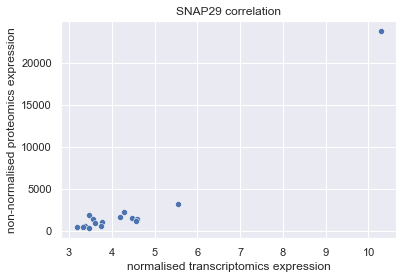

In [85]:
SNAP29_p = p_subset.loc['SNAP29']
SNAP29_t = t_subset.loc['SNAP29']

print(sp.stats.pearsonr(SNAP29_t, SNAP29_p))
sns.scatterplot(SNAP29_t, SNAP29_p).set(title='SNAP29 correlation')
plt.xlabel('normalised transcriptomics expression')
plt.ylabel('non-normalised proteomics expression')
plt.savefig('snap29_correlation', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

In [73]:
SNAP29_p = SNAP29_p.sort_values()
SNAP29_p
#OV-90 is the cell line which most influences this correlation. 

OVSAHO       258.151
OV56         370.227
KURAMOCHI    400.932
FU-OV-1      453.361
COV362       489.053
NIHOVCAR3    525.479
IGROV-1       859.27
JHOS-2       984.952
SNU-119      1174.06
RMUG-S       1395.76
HEY A8        1433.8
OVCAR-4      1442.01
TYK-nu       1647.46
A2780        1862.01
OVCAR-8      2268.26
Caov3        3137.16
OV-90        23812.4
Name: SNAP29, dtype: object

RMUG-S       10.0738
NIHOVCAR3    27.3357
JHOS-2       32.8388
OV-90          33.71
A2780        49.6864
COV362       53.9525
FU-OV-1       64.107
SNU-119      79.6507
OVSAHO       97.1004
KURAMOCHI     132.44
OV56         138.336
OVCAR-4      149.239
OVCAR-8      152.454
HEY A8       224.012
IGROV-1      236.803
Caov3        479.508
TYK-nu       3453.17
Name: ACTL8, dtype: object
(0.9556044910378042, 2.310117289023401e-09)


/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-87-840b0347cdf1>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('actl8_correlation', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-87-840b0347cdf1>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('actl8_correlation', dpi=1200, facecolor='w', edgecolor='w',


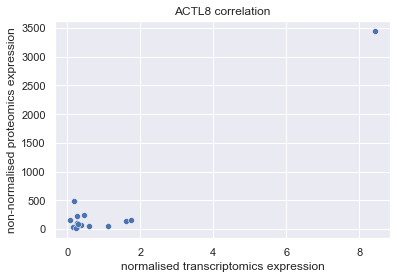

In [87]:
actl8_p = p_subset.loc['ACTL8']
actl8_t = t_subset.loc['ACTL8']
actl8_p_sorted = actl8_p.sort_values()
print(actl8_p_sorted)

print(sp.stats.pearsonr(actl8_t, actl8_p))
sns.scatterplot(actl8_t, actl8_p).set(title='ACTL8 correlation')
plt.xlabel('normalised transcriptomics expression')
plt.ylabel('non-normalised proteomics expression')
plt.savefig('actl8_correlation', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)
#TYK-nu has the most influence on this correlation. 

OVSAHO       370.024
KURAMOCHI    655.566
NIHOVCAR3    678.738
COV362       742.711
JHOS-2       1287.58
TYK-nu       1396.17
OVCAR-8      1399.53
OV-90        1412.51
OVCAR-4      2166.65
Caov3        2191.45
A2780        2198.83
HEY A8       2298.14
SNU-119      5073.05
OV56         9061.72
RMUG-S       9433.22
IGROV-1      15075.5
FU-OV-1      16644.0
Name: COBLL1, dtype: object
(0.9293451609334017, 6.977022438625847e-08)


/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'non-normalised proteomics expression')

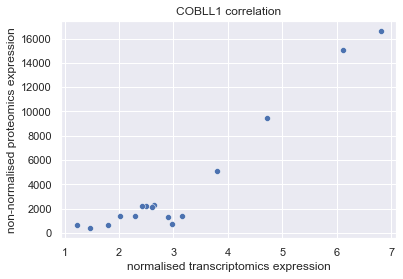

In [77]:
cobll1_p = p_subset.loc['COBLL1']
cobll1_t = t_subset.loc['COBLL1']
cobll1_p_sorted = cobll1_p.sort_values()
print(cobll1_p_sorted)

print(sp.stats.pearsonr(cobll1_t, cobll1_p))
sns.scatterplot(cobll1_t, cobll1_p).set(title='COBLL1 correlation')
plt.xlabel('normalised transcriptomics expression')
plt.ylabel('non-normalised proteomics expression')

#TYK-nu has the most influence on this correlation. 